**Name:** David Andrejsin  
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)  
**Assignment:** Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Wine dataset
wine = load_wine()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Add target (class) as a column for reference (not used in clustering)
df['target'] = wine.target

# Display the first few rows of the dataset
display(df.head())

# Examine the dataset structure
display(df.info())

# Summary statistics
display(df.describe())


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
# Standardize the features (excluding the target column)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Convert the scaled features back into a DataFrame for inspection
df_scaled = pd.DataFrame(X_scaled, columns=wine.feature_names)
df_scaled.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


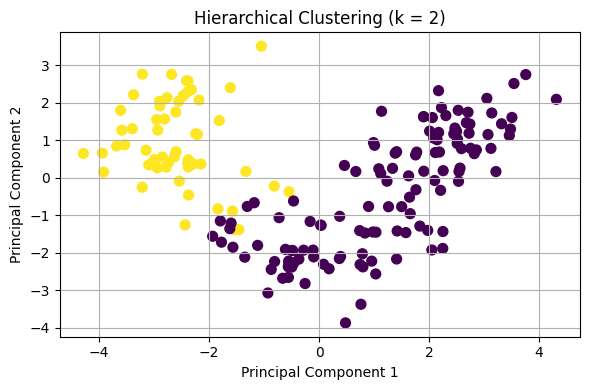

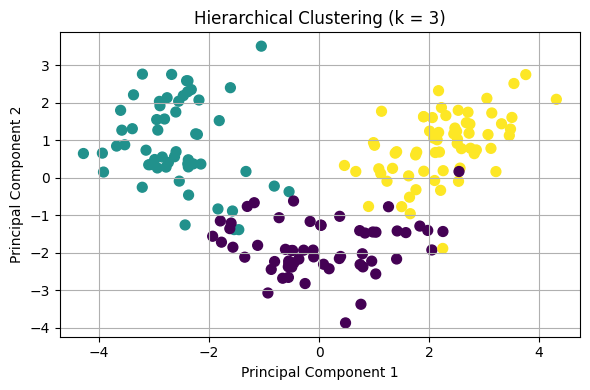

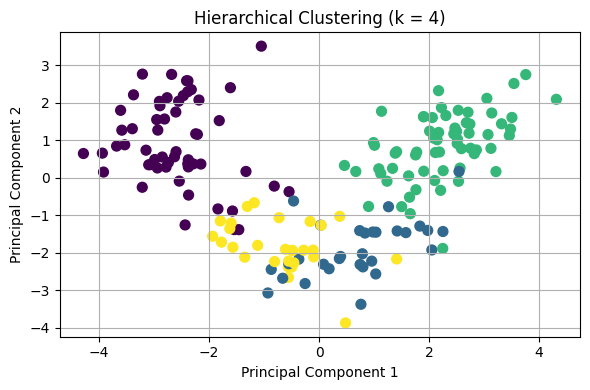

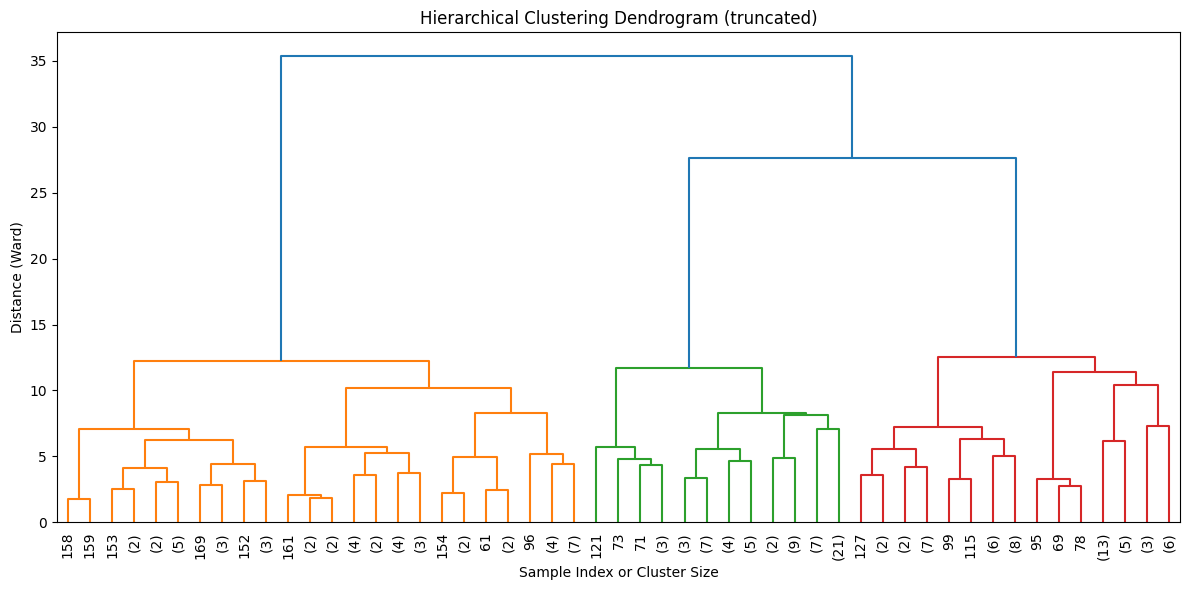

In [6]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Function to plot clusters
def plot_clusters(X_2d, labels, k):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f'Hierarchical Clustering (k = {k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Try different cluster counts
for k in [2, 3, 4]:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = model.fit_predict(X_scaled)
    plot_clusters(X_pca, cluster_labels, k)

# Generate dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix,
           truncate_mode='level',
           p=5,
           leaf_rotation=90.,
           leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance (Ward)')
plt.tight_layout()
plt.show()

TOP 10 DBSCAN CONFIGURATIONS (sorted by silhouette score):

 eps  min_samples  clusters  silhouette_score  homogeneity_score  completeness_score
2.65           11         2          0.216984           0.517680            0.590775
2.40            3         2          0.214368           0.487129            0.549122
2.60           11         2          0.211991           0.505575            0.572482
2.55           11         2          0.210445           0.494937            0.558833
2.55            9         2          0.209867           0.488841            0.557864
2.50           11         2          0.203166           0.487764            0.536752
2.50            9         2          0.202556           0.486779            0.544391
2.25            3         2          0.198443           0.493415            0.536788
2.45            7         2          0.196878           0.497150            0.547803
2.40            5         2          0.195862           0.504444            0.551868

BEST

/tmp/ipython-input-15-946086219.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


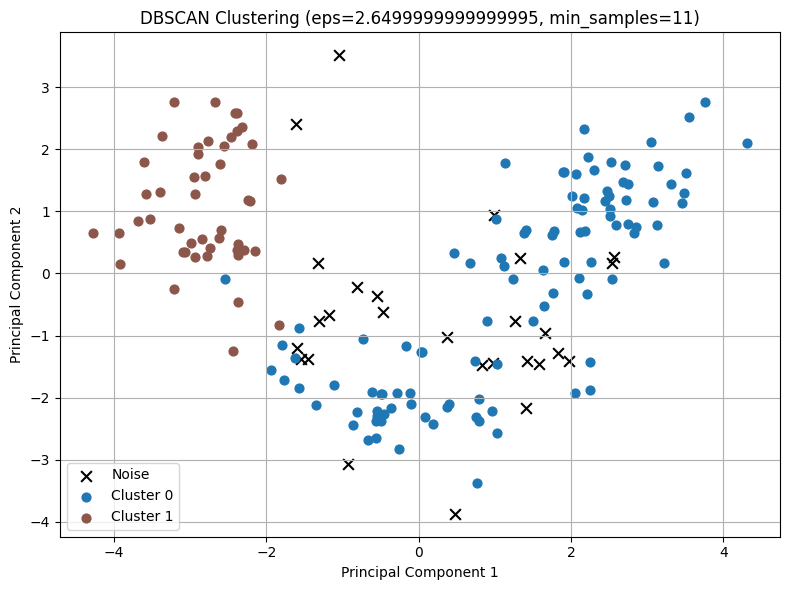

In [15]:
# ---------------------------------------------------------------------------
# STEP 3 – DBSCAN CLUSTERING
# ---------------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# --- 1. Load and standardize ------------------------------------------------
wine        = load_wine()
X           = wine.data
y           = wine.target               # ground‑truth labels for homogeneity/completeness
X_scaled    = StandardScaler().fit_transform(X)
X_pca       = PCA(n_components=2, random_state=0).fit_transform(X_scaled)  # for plotting

# --- 2. Parameter sweep -----------------------------------------------------
eps_grid        = np.arange(0.3, 3.05, 0.05)   # 0.30 … 3.00 in 0.05 steps
min_samples_set = [3, 5, 7, 9, 11]

records = []
best_cfg   = None
best_score = -np.inf                          # track best silhouette score

for eps in eps_grid:
    for m in min_samples_set:
        labels = DBSCAN(eps=eps, min_samples=m).fit_predict(X_scaled)

        # Count real clusters (exclude noise label −1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters < 2:                    # ignore all‑noise or single‑cluster runs
            continue

        sil  = silhouette_score(X_scaled, labels)
        homo = homogeneity_score(y, labels)
        comp = completeness_score(y, labels)

        records.append((eps, m, n_clusters, sil, homo, comp))

        if sil > best_score:                  # keep best config by silhouette
            best_score = sil
            best_cfg   = (eps, m, labels)

# --- 3. Results table -------------------------------------------------------
cols = ["eps", "min_samples", "clusters",
        "silhouette_score", "homogeneity_score", "completeness_score"]
results_df = pd.DataFrame(records, columns=cols).sort_values(
    "silhouette_score", ascending=False)

print("TOP 10 DBSCAN CONFIGURATIONS (sorted by silhouette score):\n")
print(results_df.head(10).to_string(index=False))

# --- 4. Plot best configuration --------------------------------------------
best_eps, best_min_samples, best_labels = best_cfg
print(f"\nBEST CONFIGURATION  ->  eps = {best_eps},  min_samples = {best_min_samples}")
print(f"Silhouette Score    = {best_score:.4f}")

# Re‑compute full metrics for display
best_homo = homogeneity_score(y, best_labels)
best_comp = completeness_score(y, best_labels)
print(f"Homogeneity Score   = {best_homo:.4f}")
print(f"Completeness Score  = {best_comp:.4f}")

unique_labels = sorted(set(best_labels))
cmap = plt.cm.get_cmap("tab10", len(unique_labels))

plt.figure(figsize=(8, 6))
for lbl in unique_labels:
    mask = best_labels == lbl
    if lbl == -1:                             # noise
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c="black", marker="x", s=60, label="Noise")
    else:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=[cmap(lbl)], s=40, label=f"Cluster {lbl}")
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
